<a href="https://colab.research.google.com/github/yeji9422/ITB2022/blob/main/1910084_%EA%B9%80%EC%98%88%EC%A7%80_%EB%B6%84%EB%A5%98_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **분류 목표: 변수를 사용하여 여성/남성 구분하기**
-분류모델: 의사결정나무, 랜덤포레스트, 그래디언트 부스팅 

-분류모델 평가: 교차검증

## **1. 한글 및 패키지 설치, 데이터 불러오기**

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import mglearn 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%matplotlib inline
import pandas as pd
import seaborn as sns          
import matplotlib.pyplot as plt

In [8]:
health2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health.csv")

print(health2.columns)
display(health2.info())      
display(health2.head())     

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)   

None

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


## **2. 데이터 전처리**
-분석과 무관하거나 사용하지 않는 데이터열 삭제

-의사결정나무에 해당 데이터를 사용하기 위해 결측치가 있는 행 모두 삭제 

In [9]:
health1 = health2.drop(columns=["데이터공개일자","흡연상태","음주여부","구강검진수검여부","치아우식증유무","치석"])
health1
#범주형 데이터열(분석에 사용하지 않음) 삭제

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,NaN,NaN,NaN,NaN,13.7,1.0,0.7,20.0,21.0,20.0
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,NaN,NaN,NaN,NaN,14.3,1.0,0.7,24.0,22.0,21.0
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,NaN,NaN,NaN,NaN,15.6,1.0,1.0,22.0,27.0,35.0
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,NaN,NaN,NaN,NaN,13.5,NaN,1.0,26.0,24.0,21.0


In [10]:
health = health1.dropna(axis=0)   
health   
#결측치 처리_결측치행 전체 삭제

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,2020,9986,44,F,14,150,70,96.0,0.4,0.7,...,110.0,132.0,35.0,49.0,14.8,1.0,0.8,23.0,24.0,15.0
9989,2020,9990,41,F,16,145,70,94.0,0.7,0.5,...,172.0,104.0,65.0,86.0,13.5,1.0,0.7,19.0,15.0,11.0
9991,2020,9992,11,M,16,155,45,70.0,0.1,0.7,...,151.0,74.0,54.0,82.0,13.0,1.0,1.4,20.0,13.0,16.0
9994,2020,9995,41,M,17,150,55,95.0,0.5,0.8,...,188.0,125.0,53.0,110.0,15.7,1.0,1.1,22.0,21.0,18.0


## **3. 전처리 데이터 시각화**
-위에서 전처리한 과정이 데이터에 잘 반영되었는지 확인


F    1995
M    1961
Name: 성별코드, dtype: int64


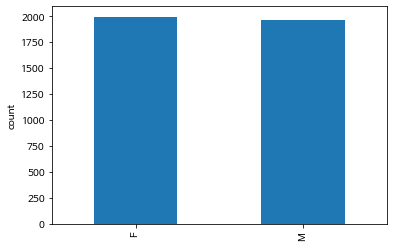

In [11]:
print(health['성별코드'].value_counts())

health['성별코드'].value_counts().plot.bar()
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


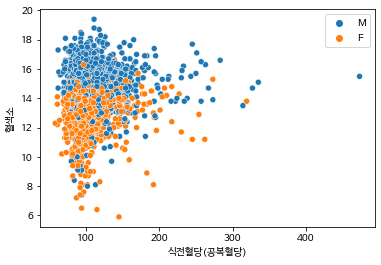

In [12]:
sns.scatterplot(health['식전혈당(공복혈당)'], health['혈색소'], health['성별코드'])
plt.xlabel("식전혈당(공복혈당)")
plt.ylabel("혈색소")
plt.legend()
plt.show()

## **4. 분류(1)_의사결정나무**
-종속(타겟)변수: 성별코드

In [13]:
health.loc[health["성별코드"] == "M", "성별코드"] = 0
health.loc[health["성별코드"] == "F", "성별코드"] = 1
health["성별코드"] = health["성별코드"].astype('int')

#의사결정나무에 사용되는 데이터는 결측치가 없어야 하며 범주형데이터를 숫자 데이터로 바꾸어주어야 함
#target 변수인 성별코드를 각각 남성은 0으로, 여성은 1로 인식하게 하고 이를 astype를 활용해 정수(int)로 변환함

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health.iloc[:, 4:] #기준년도, 가입자일련번호, 시도코드 열은 분석과 무관하므로 사용하지 않음.
y = health.iloc[:, 3]  #target 변수: 성별코드

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))


학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.912


In [15]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
#과적합을 막기 위해 나무 깊이 4로 제한함

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.919
시험용 데이터 정확도: 0.913


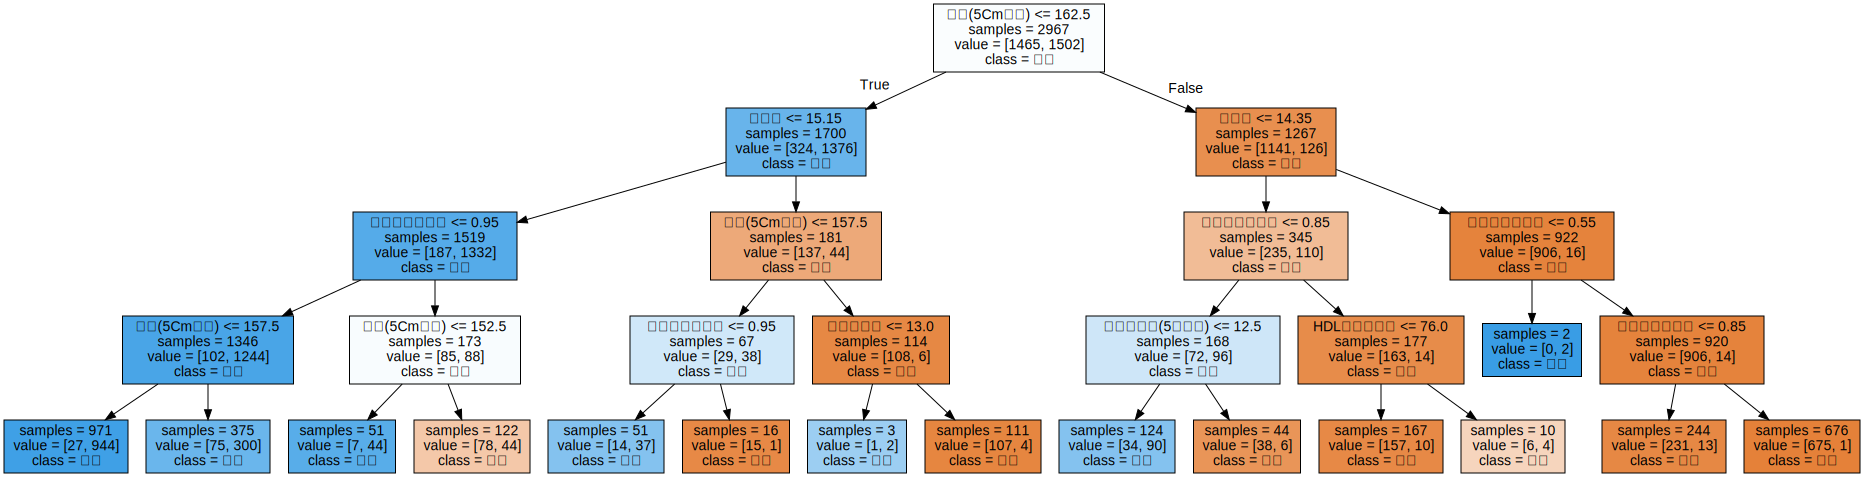

In [16]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree, out_file="tree.dot", class_names=[ "남성", "여성"],
                feature_names=X.columns, impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

## **5. 분류(2)_랜덤 포레스트**


### 5-1. 나무 생성 및 정확도 확인

=랜덤 포레스트가 단일 의사결정나무에 비해 매번 정확도가 높음을 확인할 수 있다.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


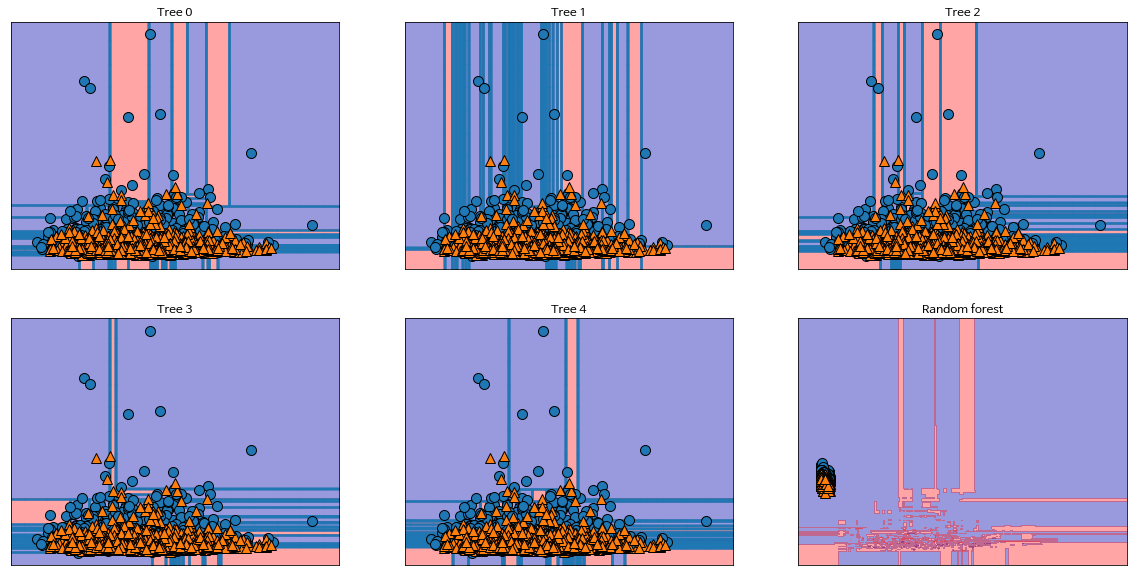

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, [14,19]], y_train)
#두 가지 변수만 활용하여 랜덤포레스트 만들기: 식전혈당(공복혈당)와 혈색소 활용

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, [14,19]].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, [14,19]].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [18]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
#전처리 이후 남은 모든 변수를 활용하여 100개의 나무를 생성함함

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.932


In [19]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

#Random forest가 Decision tree에 비해 더 높은 정확도를 보인다.(0.938>0.869)

Accuracy
Decision tree:  [0.86531987 0.88215488 0.86868687 0.88888889 0.87205387 0.90909091
 0.84848485 0.85472973 0.84459459 0.85135135]
Random forest:  [0.91582492 0.92255892 0.93939394 0.95286195 0.94612795 0.95959596
 0.92929293 0.92905405 0.94256757 0.93918919]
Accuracy mean
Decision tree :0.869
Random forest :0.938


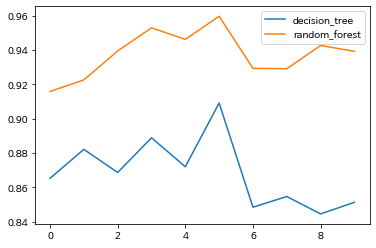

In [20]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

#그래프로 확인했을 때도 랜덤포레스트가 의사결정나무보다 언제나 더 높은 정확도를 보임을 확인할 수 있다.

### 5-2. 중요변수 확인


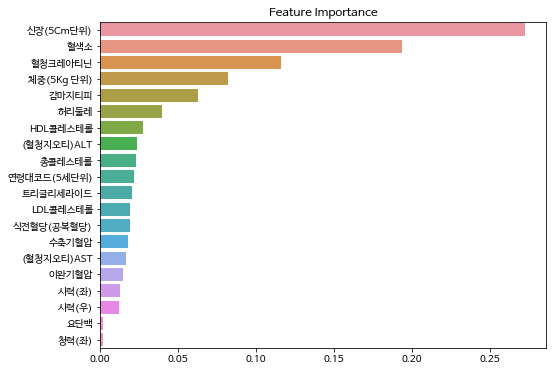

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=11)
model.fit(X_train, y_train)

ft_importance_values = model.feature_importances_

ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

#종속변수인 성별코드를 가리는 데 신장, 혈색소, 혈청크레아티닌과 같은 순서로 영향을 크게 미친 것을 알 수 있다. 

## **6. 분류(3)_그래디언트 부스팅**


### 6-1. 정확도 확인

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [23]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.971
시험용 데이터 세트 정확도: 0.945


In [24]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt.fit(X_train, y_train)
#과적합을 막기 위한 첫 번째 방법으로 나무 깊이를 4로 제한한다.

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.986
시험용 데이터 세트 정확도: 0.944


In [25]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.07)
gbrt.fit(X_train, y_train)
#과적합을 막기 위한 두 번째 방법으로 학습률을 조정한다. 

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.965
시험용 데이터 세트 정확도: 0.943


### 6-2. 중요변수 확인

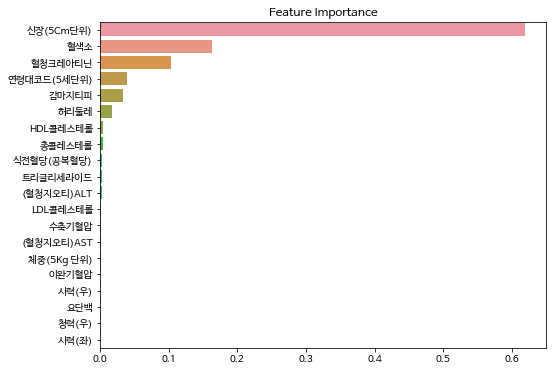

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=11)
model.fit(X_train, y_train)

ft_importance_values = model.feature_importances_

ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

#랜덤포레스트에서 구한것과 유사한 변수별 중요도를 보인다.
#신장, 혈색소, 혈청크레아티닌까지 랜덤포레스트에서 보인 변수 별 중요도와 동일하다.

## **7. 분류모델 평가_교차검증**

-그래디언트 부스팅>랜덤포레스트>의사결정나무 순서로 높은 정확도를 보인다.

In [27]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

#그래디언트 부스팅> 랜덤포레스트> 의사결정나무 순서로 높은 정확도를 보인다. 
#따라서 health 데이터를 사용하여 성별코드를 정확하게 얻어내기 위해서는 그래디언트 부스팅 모델이 가장 적합함을 알 수 있다. 

Accuracy
Decision tree:  [0.86531987 0.88215488 0.86868687 0.88888889 0.87205387 0.90909091
 0.84848485 0.85472973 0.84459459 0.85135135]
Random forest:  [0.91582492 0.92255892 0.93939394 0.95286195 0.94612795 0.95959596
 0.92929293 0.92905405 0.94256757 0.93918919]
Gradient boosting:  [0.92929293 0.93602694 0.94276094 0.96969697 0.94949495 0.95286195
 0.93265993 0.94932432 0.94932432 0.92905405]
Accuracy mean
Decision tree :0.869
Random forest :0.938
Gradient boosting :0.944
